Data Analyst Air Quality Index by State 1980 - 2022 Dataset source: https://www.kaggle.com/datasets/adampq/air-quality-index-by-state-1980-2022

In [1]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')
import hvplot.pandas

In [2]:
aqi_data = pd.read_csv('C:/Users/linhn/OneDrive/Desktop/Project_AQI/AQI_data/AQI By State 1980-2022.csv')

In [3]:
# Overall check for missing values in the dataset
overall_missing = aqi_data.isnull().sum().sum()

#Column-wise check for missing values
column_wise_missing = aqi_data.isnull().sum()
#overall_missing, column_wise_missing

In [4]:
# Splitting Geo_loc in two separate columns for latitude and longtitude
aqi_data[['Latitude','Longitude']] = aqi_data['Geo_Loc'].str.strip('POINT ()').str.split(' ', expand=True)

# Converting the new columns to numeric values
aqi_data['Latitude'] = pd.to_numeric(aqi_data['Latitude'])
aqi_data['Longitude'] = pd.to_numeric(aqi_data['Longitude'])

In [5]:
#aqi_data.info()

In [6]:
# Columns to average per county
columns_to_average = ['Dys_w_AQI', 'Dys_NM', 'Dys_Blw_Thr', 'Dys_Abv_Thr', 'Good Days', 'Median AQI','Moderate Days', 
                      'Unhealthy for Sensitive Groups Days', 'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 
                      'Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10', 'Max AQI']  
# Calculate the average per county
for col in columns_to_average:
    aqi_data[f'Avg {col} per County'] = aqi_data[col] / aqi_data['Cnty_Rpt']

In [7]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [8]:
import ipywidgets as widgets
from IPython.display import display

In [11]:
#Create interactive map to visualize the average median AQI per county for all states with a year slider
from ipywidgets import fixed, interactive
import plotly.express as px
# import plotly.graph_objects as go
year_slider = widgets.IntSlider(
    value=aqi_data['Year'].min(), 
    min=aqi_data['Year'].min(), 
    max=aqi_data['Year'].max(), 
    step=1, 
    description='Year',
    continuous_update=False
)
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
    }
aqi_data['State_short'] = aqi_data['State'].map(state_abbreviations)
max_aqi = aqi_data['Avg Median AQI per County'].max()
min_aqi = aqi_data['Avg Median AQI per County'].min()
def plot_map_for_year(year, aqi_data):
    filtered_data = aqi_data[aqi_data['Year'] == year].copy()
    #filtered_data['Normalized Avg Median AQI per County'] = (filtered_data['Avg Median AQI per County'] - min_aqi) / (max_aqi - min_aqi)
    #filtered_data['Normalized Median AQI'] = (filtered_data['Median AQI'] - min_aqi) / (max_aqi - min_aqi)
#Using normalized AQI to higlight the difference in AQI median values of all states 
    map = px.choropleth(filtered_data,
                        locationmode='USA-states',    # Ensures that the map is USA states
                        locations='State_short',           # Column in your DataFrame with state identifiers
                        color='Avg Median AQI per County',      # Use Normalized AQI for coloring
                        hover_name='State_short',          # Column to show in hover information
                        scope="usa",                 # Scope to focus on the USA
                        title=f'Avg Median AQI per County Map for {year}',
                        color_continuous_scale='Jet',# Set the color scale to Jet
                        range_color=[min_aqi,max_aqi]) 
    map.show()
widgets.interactive(plot_map_for_year, year=year_slider, aqi_data=fixed(aqi_data)) # Fix to ensure input data does not change in the interactive plot


interactive(children=(IntSlider(value=1980, continuous_update=False, description='Year', max=2022, min=1980), …

In general, from 1980 to 2022 the median AQI tends to decrease, which proves that there is positive attention to air quality in the US.

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interactive, fixed, IntSlider

max_popu=aqi_data['Pop_Est'].max()
min_popu=aqi_data['Pop_Est'].min()

def plot_map_for_year(year, aqi_data):
    filtered_data = aqi_data[aqi_data['Year'] == year].copy()
    #filtered_data['Normalized Avg Median AQI per County'] = (filtered_data['Avg Median AQI per County'] - min_aqi) / (max_aqi - min_aqi)
    #filtered_data['Normalized Population'] = (filtered_data['Pop_Est'] - min_popu) / (max_popu - min_popu)
    #max_popu=aqi_data['Pop_Est'].max()
    #min_popu=aqi_data['Pop_Est'].min()
    # AQI Choropleth Map
    aqi_map = go.Choropleth(
        locationmode='USA-states',
        locations=filtered_data['State_short'],
        z=filtered_data['Avg Median AQI per County'],
        colorscale='Jet',
        colorbar=dict(title='Avg Median AQI per County', x=0.46),
        zmin=min_aqi, zmax=max_aqi)

    # Population Choropleth Map 
    population_map = go.Choropleth(
        locationmode='USA-states',
        locations=filtered_data['State_short'],
        z=aqi_data['Pop_Est'],
        colorscale='Jet',
        colorbar=dict(title='Population', x=1),
        zmin=min_popu, zmax=max_popu)
    

    # Create a subplot
    fig = make_subplots(rows=1, cols=2, subplot_titles=("Avg Median AQI per County Map", "Population Map"),
                        specs=[[{"type": "choropleth"}, {"type": "choropleth"}]],
                        horizontal_spacing=0.05)

    # Add AQI map
    fig.add_trace(aqi_map, 1, 1)

    # Add Population map
    fig.add_trace(population_map, 1, 2)

    # Update the layout of the figure
    fig.update_layout(
        height=500,
        title_text=f'Year: {year}',
        geo=dict(scope='usa', domain=dict(x=[0, 0.45])),
        geo2=dict(scope='usa', domain=dict(x=[0.55, 1])),
    )

    fig.show()

# Slider widget
year_slider = IntSlider(
    value=aqi_data['Year'].min(), 
    min=aqi_data['Year'].min(), 
    max=aqi_data['Year'].max(), 
    step=1, 
    description='Year',
    continuous_update=False
)

# Interactive widget
interactive_plot = interactive(plot_map_for_year, year=year_slider, aqi_data=fixed(aqi_data))
display(interactive_plot)


interactive(children=(IntSlider(value=1980, continuous_update=False, description='Year', max=2022, min=1980), …

There appears to be no direct correlation visible between population density and AQI values based on these two maps. So, we calculate the correlation between Average median AQI and population to verify

In [13]:
#Correlation between Average median AQI and population 
correlation = aqi_data[['Avg Median AQI per County', 'Pop_Est']].corr(method='pearson')
print(correlation)

                           Avg Median AQI per County   Pop_Est
Avg Median AQI per County                   1.000000  0.273649
Pop_Est                                     0.273649  1.000000


There is no correlation between the average median AQI per county and the population for all states. However, we can find a correlation between the average median AQI and the population of each state

In [14]:
from scipy.stats import pearsonr
states=aqi_data['State'].unique()
corr=[]
p_value=[]
for state in states:
    filter_data = aqi_data[aqi_data['State'] == state]
    med_aqi_tmp=filter_data['Avg Median AQI per County']
    pop_est_tmp=filter_data['Pop_Est']
    # Filter out pairs where either element is NaN
    valid_mask = ~np.isnan(med_aqi_tmp) & ~np.isnan(pop_est_tmp)
    med_aqi_tmp = med_aqi_tmp[valid_mask]
    pop_est_tmp = pop_est_tmp[valid_mask]

    # Calculate Pearson correlation coefficient
    corr_tmp, p_value_tmp = pearsonr(med_aqi_tmp, pop_est_tmp)
    corr.append(corr_tmp)
    p_value.append(p_value_tmp)
# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'State': states,
    'Pearson Correlation Coefficient1': corr,
    'P-value': p_value
})

# Display the results
results_df = results_df.sort_values(by='Pearson Correlation Coefficient1', ascending=False)
results_df = results_df.reset_index(drop=True)
results_df

,State,Pearson Correlation Coefficient1,P-value
0,Wyoming,0.787745,2.669779e-09
1,Michigan,0.784950,4.649030e-10
2,South Dakota,0.746005,7.638471e-08
3,Iowa,0.674387,7.112592e-07
4,North Dakota,0.665323,1.131072e-06
5,Indiana,0.487047,9.257657e-04
6,Maine,0.458780,1.973096e-03
7,Arizona,0.440181,3.138451e-03
8,Missouri,0.427439,4.250996e-03
9,Wisconsin,0.424014,4.603289e-03


Find states which have the correlation more than 0.5 and less than -0.5

In [17]:
# Filtering for states with high positive correlation (>= 0.7)
high_positive_corr_states = results_df[results_df['Pearson Correlation Coefficient1'] >= 0.5]

# Filtering for states with high negative correlation (<= -0.7)
high_negative_corr_states = results_df[results_df['Pearson Correlation Coefficient1'] <= -0.5]

# Combining the results
high_corr_states = pd.concat([high_positive_corr_states, high_negative_corr_states]).reset_index(drop=True)

# Display the results
print(high_corr_states)

            State  Pearson Correlation Coefficient1       P-value
0         Wyoming                          0.787745  2.669779e-09
1        Michigan                          0.784950  4.649030e-10
2    South Dakota                          0.746005  7.638471e-08
3            Iowa                          0.674387  7.112592e-07
4    North Dakota                          0.665323  1.131072e-06
5          Nevada                         -0.560772  9.180882e-05
6           Idaho                         -0.591098  2.999423e-05
7     Connecticut                         -0.609439  1.441087e-05
8      California                         -0.620828  8.928784e-06
9    Rhode Island                         -0.668372  9.693825e-07
10  Massachusetts                         -0.677412  6.070606e-07
11         Alaska                         -0.695693  2.237627e-07
12       Virginia                         -0.701194  1.633400e-07
13         Oregon                         -0.847231  7.895892e-13
14     Was

- Positive Correlation in States like Wyoming and Michigan: For states like Wyoming (0.787745) and Michigan (0.784950), there is a significant positive correlation between population size and AQI. This suggests that in these states, as the population size increases, the AQI tends to be higher, indicating worse air quality. 
- Negative Correlation in States like Oregon and Washington: On the other hand, states like Oregon (-0.847231) and Washington (-0.854312) show a significant negative correlation between population size and AQI. This indicates that in these states, higher population sizes tend to be associated with lower AQI values, suggesting better air quality.
- The data shows a wide variation in the correlation between population size and AQI across different states. This suggests that other factors may be influencing air quality in addition to population size, such as industrial activity, geographic location, state regulations, and environmental policies.
- Statistical Significance Across All States: All the states listed have p-values well below the typical threshold of 0.05 for statistical significance, indicating that the observed correlations are not likely to have occurred by chance. 
- Policy Implications: This data can be useful for policymakers. States with a positive correlation might need to investigate why larger populations are associated with poorer air quality and take steps to mitigate this effect. Conversely, states with a negative correlation may be doing something effectively that could be modeled in other states

In [21]:
#Create a combo box of states connected to a line chart to visualize the time series of median AQI 
# Dropdown widget for states
state_dropdown = widgets.Dropdown(
    options = sorted(aqi_data['State'].unique()),
    description = 'State:',
    value = 'California'  # Default value, change as needed
)

# Function to update the plot based on the selected state
def update_plot(state):
    filtered_data = aqi_data[aqi_data['State'] == state]
    fig = px.line(filtered_data, x='Year', y='Avg Median AQI per County', title=f'Avg Median AQI per County in {state} Over Time')
    fig.show()

# Display the dropdown and update the plot when the selection changes
widgets.interactive(update_plot, state=state_dropdown)

interactive(children=(Dropdown(description='State:', index=4, options=('Alabama', 'Alaska', 'Arizona', 'Arkans…

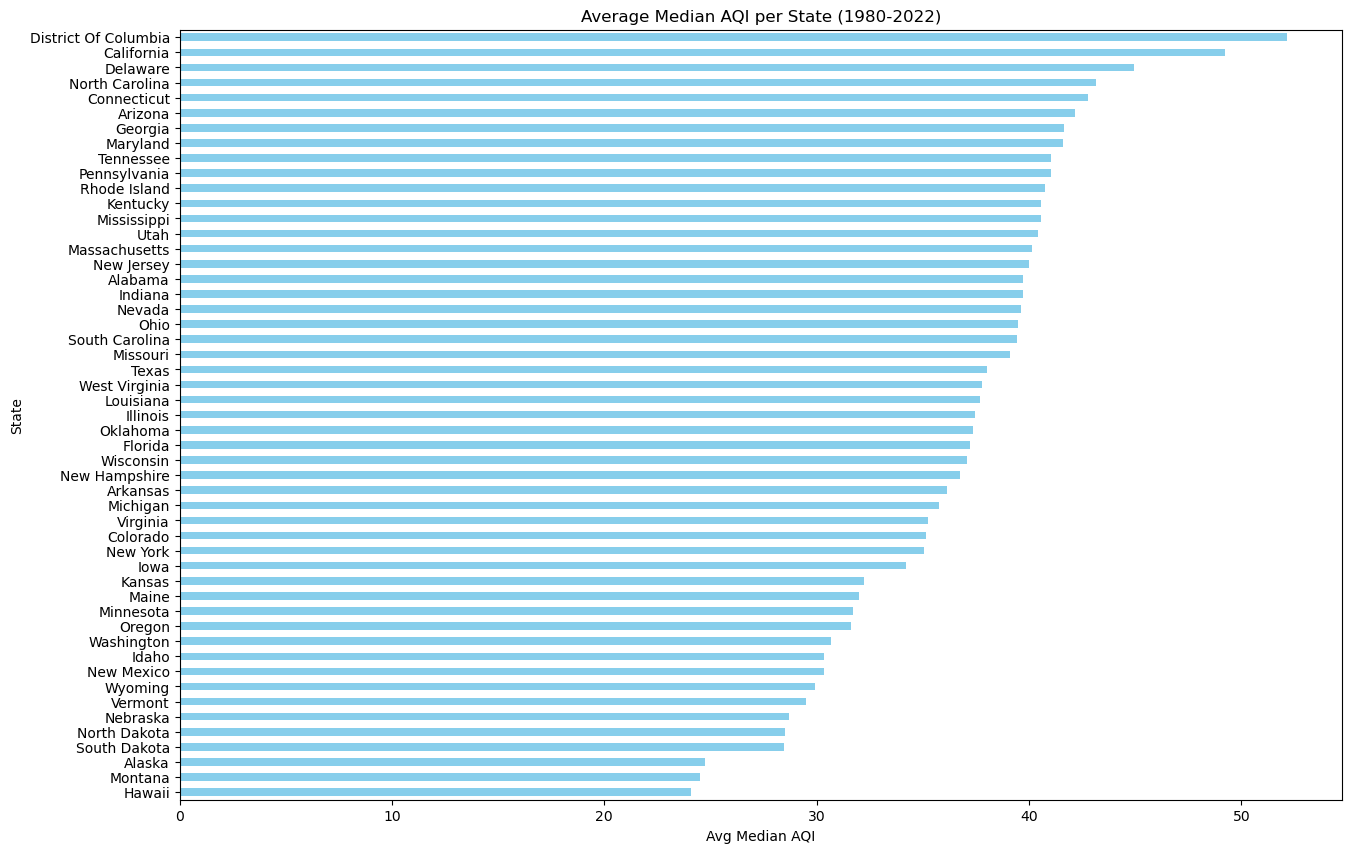

In [20]:
import matplotlib.pyplot as plt
# Average Median AQI for each state
# Calculate the average Median AQI for each state over the entire period
avg_median_aqi_per_state = aqi_data.groupby('State')['Avg Median AQI per County'].mean()
avg_median_aqi_per_state  = aqi_data.groupby('State')['Avg Median AQI per County'].mean().sort_values()
# Visualization
plt.figure(figsize=(15, 10))
avg_median_aqi_per_state .plot(kind='barh', color='skyblue')
plt.title('Average Median AQI per State (1980-2022)')
plt.xlabel('Avg Median AQI')
plt.ylabel('State')
plt.show()

The average median AQI of all states is below 100. However, we can further analyze the average maximum AQI achieved by each state for better understanding.

In [22]:
# Identify the top five states with the highest average Median AQI
top_five_states_highest_aqi = avg_median_aqi_per_state.sort_values(ascending=False).head(5)

top_five_states_highest_aqi

State
District Of Columbia    52.139535
California              49.227496
Delaware                44.934109
North Carolina          43.136009
Connecticut             42.800388
Name: Avg Median AQI per County, dtype: float64

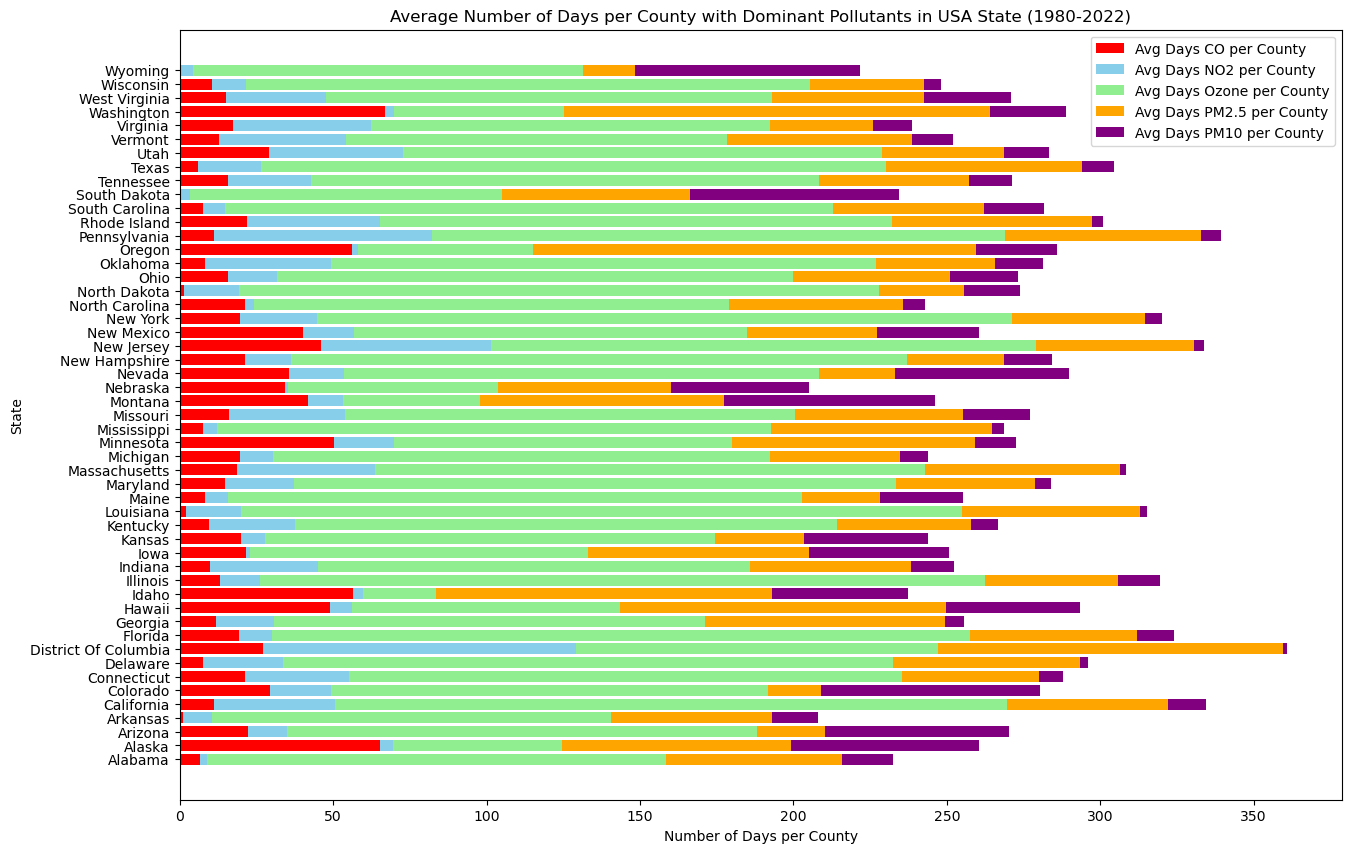

In [23]:
import matplotlib.pyplot as plt

# Visualization for each pollutant
plt.figure(figsize=(15, 10))

pollutants = ['Avg Days CO per County', 'Avg Days NO2 per County', 'Avg Days Ozone per County', 
              'Avg Days PM2.5 per County', 'Avg Days PM10 per County']

# Assign specific colors to each pollutant
colors = ['red', 'skyblue', 'lightgreen', 'orange', 'purple']

# Preparing data for stacking
state_pollutant_data = {pollutant: aqi_data.groupby('State')[pollutant].mean() for pollutant in pollutants}
states = aqi_data['State'].unique()
# print(state_pollutant_data)
# Plotting stacked bars for each state
for state in states:
    bottom_val = 0  # Initialize the bottom at 0 for each state
    for pollutant, color in zip(pollutants, colors):
        plt.barh(state, state_pollutant_data[pollutant][state], left=bottom_val, color=color)
        bottom_val += state_pollutant_data[pollutant][state]

plt.title('Average Number of Days per County with Dominant Pollutants in USA State (1980-2022)')
plt.xlabel('Number of Days per County')
plt.ylabel('State')

# Create the legend once, outside the loop
for pollutant, color in zip(pollutants, colors):
    plt.barh(0, 0, color=color, label=pollutant)

plt.legend()
plt.show()


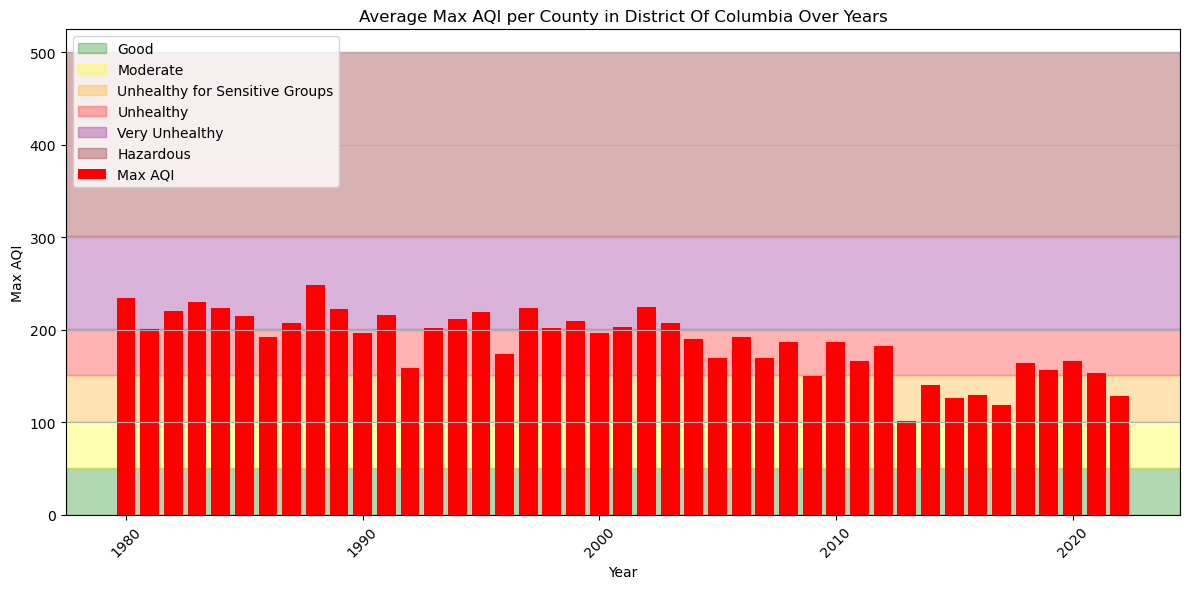

In [51]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Plotting the bar chart
plt.figure(figsize=(12, 6))

# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Filter data for District Of Columbia  
district_columbia_data = aqi_data[aqi_data['State'] == 'District Of Columbia']
district_columbia_median_aqi = district_columbia_data[['Year', 'Avg Max AQI per County']]
district_columbia_median_aqi = district_columbia_data.sort_values(by = 'Year')
# Plot the Median AQI values
plt.bar(district_columbia_median_aqi['Year'], district_columbia_median_aqi['Avg Max AQI per County'], color='red', label='Max AQI')
plt.title('Average Max AQI per County in District Of Columbia Over Years')
plt.xlabel('Year')
plt.ylabel('Max AQI')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add horizontal grid lines for better readability
plt.legend(loc='upper left')  # Add legend to the plot
plt.tight_layout()  # Adjust the layout
plt.show()

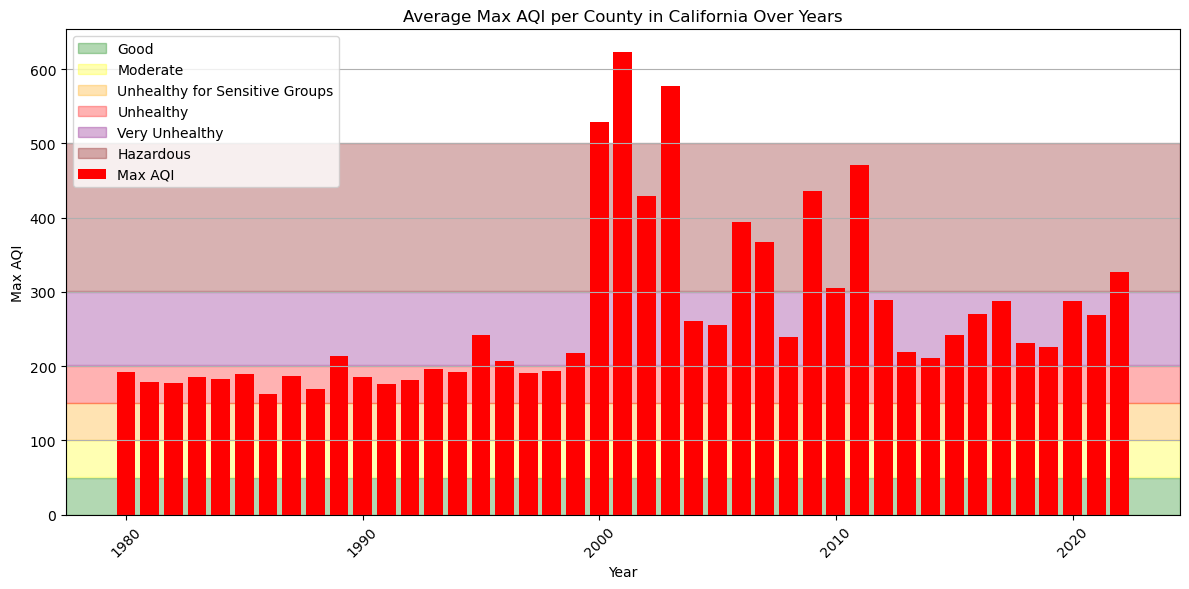

In [52]:
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Plotting the bar chart
plt.figure(figsize=(12, 6))

# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Filter data for California
california_data = aqi_data[aqi_data['State'] == 'California']
california_median_aqi = california_data[['Year', 'Avg Max AQI per County']]
california_median_aqi = california_data.sort_values(by = 'Year')
# Plot the Median AQI values
plt.bar(california_median_aqi['Year'], california_median_aqi['Avg Max AQI per County'], color='red', label='Max AQI')
plt.title('Average Max AQI per County in California Over Years')
plt.xlabel('Year')
plt.ylabel('Max AQI')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add horizontal grid lines for better readability
plt.legend(loc='upper left')  # Add legend to the plot
plt.tight_layout()  # Adjust the layout
plt.show()

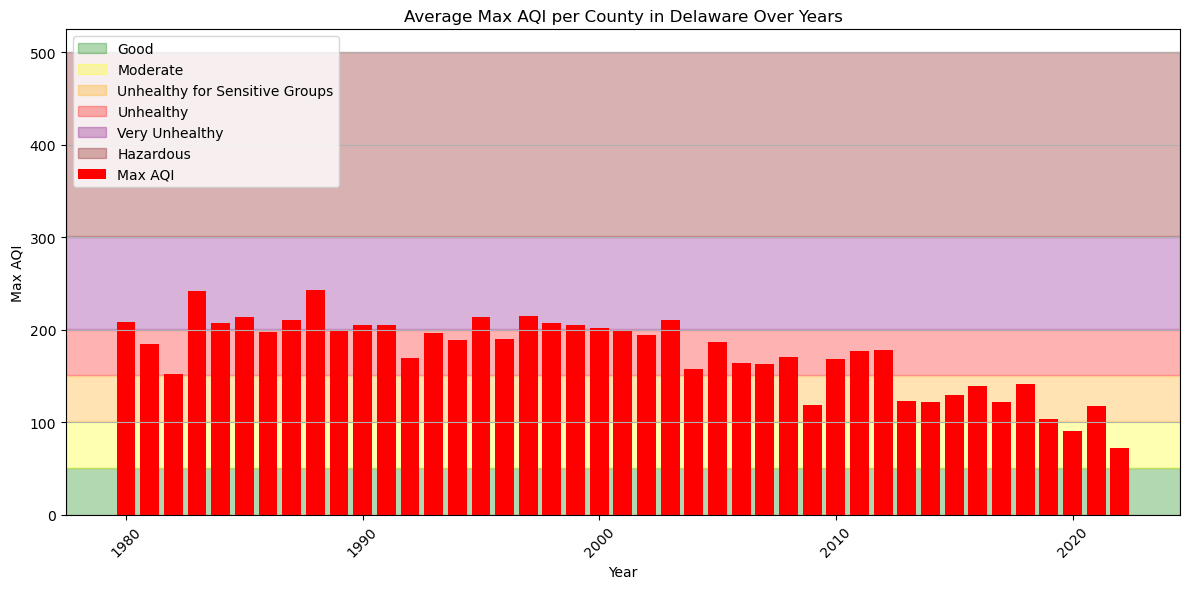

In [53]:
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Plotting the bar chart
plt.figure(figsize=(12, 6))

# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Filter data for Delaware
delaware_data = aqi_data[aqi_data['State'] == 'Delaware']
delaware_median_aqi = delaware_data[['Year', 'Avg Max AQI per County']]
delaware_median_aqi = delaware_data.sort_values(by = 'Year')
# Plot the Median AQI values
plt.bar(delaware_median_aqi['Year'], delaware_median_aqi['Avg Max AQI per County'], color='red', label='Max AQI')
plt.title('Average Max AQI per County in Delaware Over Years')
plt.xlabel('Year')
plt.ylabel('Max AQI')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add horizontal grid lines for better readability
plt.legend(loc='upper left')  # Add legend to the plot
plt.tight_layout()  # Adjust the layout
plt.show()

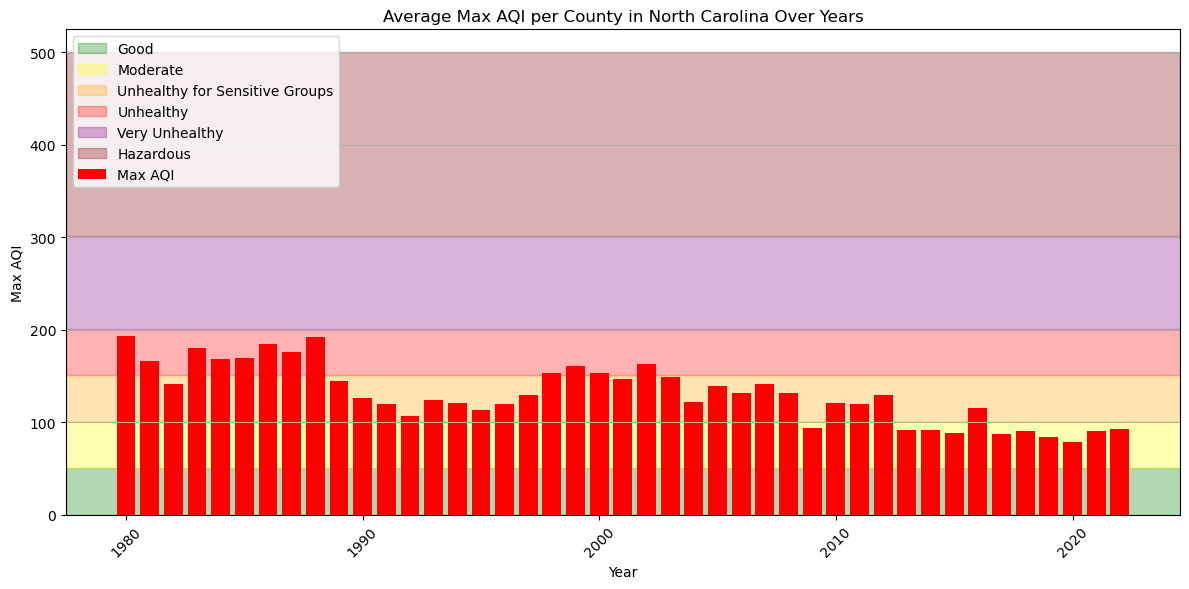

In [55]:
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Plotting the bar chart
plt.figure(figsize=(12, 6))

# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Filter data for North Carolina  
north_carolina_data = aqi_data[aqi_data['State'] == 'North Carolina']
north_carolina_median_aqi = north_carolina_data[['Year', 'Avg Max AQI per County']]
north_carolina_median_aqi = north_carolina_data.sort_values(by = 'Year')
# Plot the Median AQI values
plt.bar(north_carolina_median_aqi['Year'], north_carolina_median_aqi['Avg Max AQI per County'], color='red', label='Max AQI')
plt.title('Average Max AQI per County in North Carolina Over Years')
plt.xlabel('Year')
plt.ylabel('Max AQI')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add horizontal grid lines for better readability
plt.legend(loc='upper left')  # Add legend to the plot
plt.tight_layout()  # Adjust the layout
plt.show()

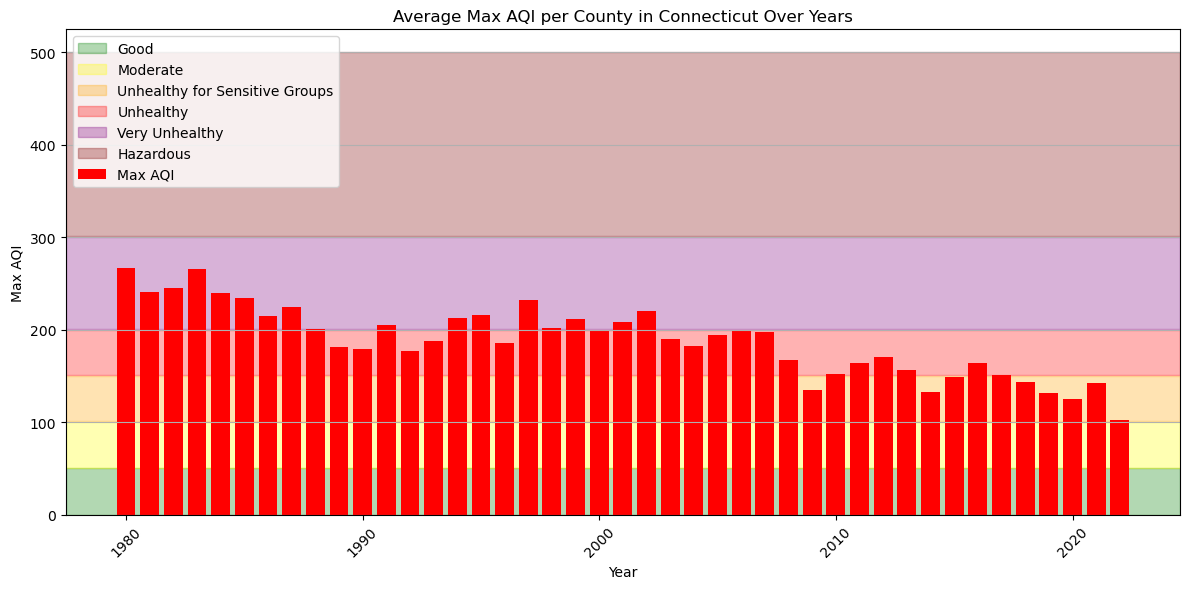

In [56]:
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Plotting the bar chart
plt.figure(figsize=(12, 6))

# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Filter data for Connecticut  
connecticut_data = aqi_data[aqi_data['State'] == 'Connecticut']
connecticut_median_aqi = connecticut_data[['Year', 'Avg Max AQI per County']]
connecticut_median_aqi = connecticut_data.sort_values(by = 'Year')
# Plot the Median AQI values
plt.bar(connecticut_median_aqi['Year'], connecticut_median_aqi['Avg Max AQI per County'], color='red', label='Max AQI')
plt.title('Average Max AQI per County in Connecticut Over Years')
plt.xlabel('Year')
plt.ylabel('Max AQI')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add horizontal grid lines for better readability
plt.legend(loc='upper left')  # Add legend to the plot
plt.tight_layout()  # Adjust the layout
plt.show()

In [24]:
# Dropdown widget for states
state_dropdown = widgets.Dropdown(
    options = sorted(aqi_data['State'].unique()),
    description = 'State:',
    value = 'California'  # Default value, change as needed
)

# Function to update the plot based on the selected state
def update_plot(state):
    filtered_data = aqi_data[aqi_data['State'] == state]
    fig = px.line(filtered_data, x='Year', y='Avg Median AQI per County', title=f'Avg Median AQI per County in {state} Over Time')
    fig.show()

# Display the dropdown and update the plot when the selection changes
widgets.interactive(update_plot, state=state_dropdown)
def plot_pollutant_trends(state):
    state_data = aqi_data[aqi_data['State'] == state]
    pollutants = ['Avg Days CO per County', 'Avg Days NO2 per County', 'Avg Days Ozone per County', 'Avg Days PM2.5 per County', 'Avg Days PM10 per County']
    fig = go.Figure()

    for pollutant in pollutants:
        fig.add_trace(go.Scatter(x=state_data['Year'], y=state_data[pollutant], 
                                 mode='lines', name=pollutant))

    fig.update_layout(title=f'Pollutant Trends in {state} (1980-2022)', 
                      xaxis_title='Year', yaxis_title='Number of Days', 
                      hovermode='x unified')
    fig.show()

widgets.interactive(plot_pollutant_trends, state=state_dropdown)

interactive(children=(Dropdown(description='State:', index=4, options=('Alabama', 'Alaska', 'Arizona', 'Arkans…

In [25]:
from scipy.stats import pearsonr
states=aqi_data['State'].unique()
corr=[]
p_value=[]
for state in states:
    filter_data = aqi_data[aqi_data['State'] == state]
    med_aqi_tmp=filter_data['Avg Median AQI per County']
    pop_est_tmp=filter_data['Pop_Est']
    # Filter out pairs where either element is NaN
    valid_mask = ~np.isnan(med_aqi_tmp) & ~np.isnan(pop_est_tmp)
    med_aqi_tmp = med_aqi_tmp[valid_mask]
    pop_est_tmp = pop_est_tmp[valid_mask]

    # Calculate Pearson correlation coefficient
    corr_tmp, p_value_tmp = pearsonr(med_aqi_tmp, pop_est_tmp)
    corr.append(corr_tmp)
    p_value.append(p_value_tmp)
# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'State': states,
    'Pearson Correlation Coefficient1': corr,
    'P-value': p_value
})

# Display the results
results_df = results_df.sort_values(by='Pearson Correlation Coefficient1', ascending=False)
results_df = results_df.reset_index(drop=True)
results_df

,State,Pearson Correlation Coefficient1,P-value
0,Wyoming,0.787745,2.669779e-09
1,Michigan,0.784950,4.649030e-10
2,South Dakota,0.746005,7.638471e-08
3,Iowa,0.674387,7.112592e-07
4,North Dakota,0.665323,1.131072e-06
5,Indiana,0.487047,9.257657e-04
6,Maine,0.458780,1.973096e-03
7,Arizona,0.440181,3.138451e-03
8,Missouri,0.427439,4.250996e-03
9,Wisconsin,0.424014,4.603289e-03


Find 3 states which have the correlation between average median AQI and Population equal or more than 0.7, equal or more than -0.7

In [26]:
# Filtering for states with high positive correlation (>= 0.7)
high_positive_corr_states = results_df[results_df['Pearson Correlation Coefficient1'] >= 0.7]

# Filtering for states with high negative correlation (<= -0.7)
high_negative_corr_states = results_df[results_df['Pearson Correlation Coefficient1'] <= -0.7]

# Combining the results
high_corr_states = pd.concat([high_positive_corr_states, high_negative_corr_states])

# Display the results
print(high_corr_states)

           State  Pearson Correlation Coefficient1       P-value
0        Wyoming                          0.787745  2.669779e-09
1       Michigan                          0.784950  4.649030e-10
2   South Dakota                          0.746005  7.638471e-08
48      Virginia                         -0.701194  1.633400e-07
49        Oregon                         -0.847231  7.895892e-13
50    Washington                         -0.854312  3.203111e-13


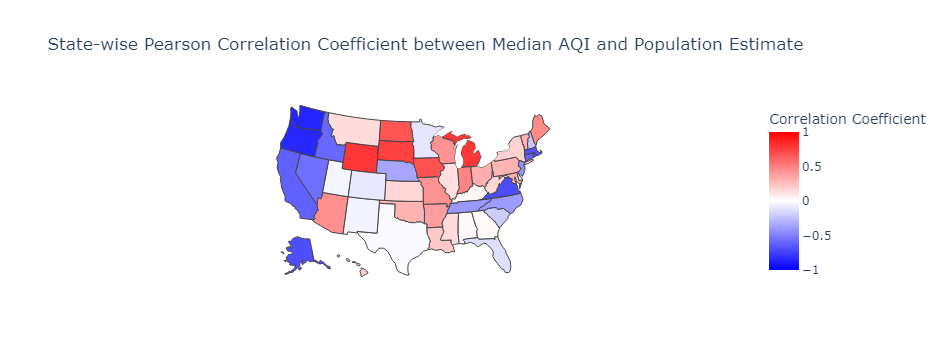

In [27]:
import plotly.express as px
results_df['State_short'] = results_df['State'].map(state_abbreviations)
# Normalize the correlation coefficient to fit the color scale from -1 to 1
results_df['Normalized Correlation'] = results_df['Pearson Correlation Coefficient1']

# Creating the choropleth map
fig = px.choropleth(results_df,
                    locationmode='USA-states',    # Ensures that the map is USA states
                    locations='State_short',     # Column in your DataFrame with state abbreviations
                    color='Normalized Correlation',  # Column providing the values for coloring
                    color_continuous_scale=[(0, "blue"), (0.5, "white"), (1, "red")],  # Color scale
                    range_color=(-1, 1),  # Range of color scale
                    scope="usa",          # Scope to focus on the USA
                    labels={'Normalized Correlation': 'Correlation Coefficient'},
                    title='State-wise Pearson Correlation Coefficient between Median AQI and Population Estimate')

# Show the figure
fig.show()

In [28]:
from scipy.stats import pearsonr
states=aqi_data['State'].unique()
corr=[]
p_value=[]
for state in states:
    filter_data = aqi_data[aqi_data['State'] == state]
    med_aqi_tmp=filter_data['Avg Median AQI per County']
    ozone_tmp=filter_data['Avg Days Ozone per County']
    # Filter out pairs where either element is NaN
    valid_mask = ~np.isnan(med_aqi_tmp) & ~np.isnan(ozone_tmp)
    med_aqi_tmp = med_aqi_tmp[valid_mask]
    ozone_tmp = ozone_tmp[valid_mask]

    # Calculate Pearson correlation coefficient
    corr_tmp, p_value_tmp = pearsonr(med_aqi_tmp, ozone_tmp)
    corr.append(corr_tmp)
    p_value.append(p_value_tmp)
# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'State': states,
    'Pearson Correlation Coefficient2': corr,
    'P-value': p_value
})

# Display the results
results_df = results_df.sort_values(by='Pearson Correlation Coefficient2', ascending=False)
results_df = results_df.reset_index(drop=True)
results_df



,State,Pearson Correlation Coefficient2,P-value
0,South Dakota,0.893428,4.517930e-14
1,North Dakota,0.876531,1.342328e-14
2,Wyoming,0.873042,4.268646e-13
3,Montana,0.650725,2.311695e-06
4,Oklahoma,0.650448,2.342408e-06
5,Maine,0.633962,5.019157e-06
6,Oregon,0.591334,2.972109e-05
7,New Mexico,0.574033,5.705856e-05
8,Kansas,0.502107,6.020206e-04
9,Colorado,0.457730,2.026904e-03


In [29]:
# Filtering for states with high positive correlation (>= 0.7)
high_positive_corr_states = results_df[results_df['Pearson Correlation Coefficient2'] >= 0.7]

# Filtering for states with high negative correlation (<= -0.7)
high_negative_corr_states = results_df[results_df['Pearson Correlation Coefficient2'] <= -0.7]

# Combining the results
high_corr_states = pd.concat([high_positive_corr_states, high_negative_corr_states])

# Display the results
print(high_corr_states)

          State  Pearson Correlation Coefficient2       P-value
0  South Dakota                          0.893428  4.517930e-14
1  North Dakota                          0.876531  1.342328e-14
2       Wyoming                          0.873042  4.268646e-13


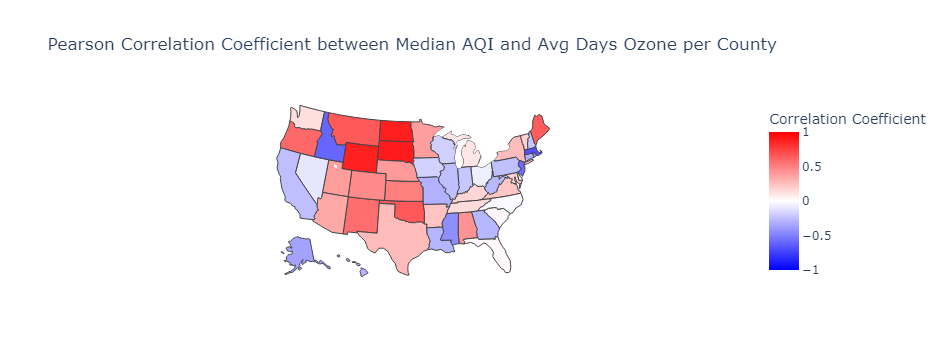

In [30]:
import plotly.express as px

# Assuming you have a dictionary called 'state_abbreviations' that maps state names to their abbreviations
# You can also find this dictionary in my previous responses or construct it based on your data
results_df['State_short'] = results_df['State'].map(state_abbreviations)

# Normalize the correlation coefficient to fit the color scale from -1 to 1
results_df['Normalized Correlation'] = results_df['Pearson Correlation Coefficient2']

# Creating the choropleth map
fig = px.choropleth(results_df,
                    locationmode='USA-states',    # Ensures that the map is USA states
                    locations='State_short',     # Column in your DataFrame with state abbreviations
                    color='Normalized Correlation',  # Column providing the values for coloring
                    color_continuous_scale=[(0, "blue"), (0.5, "white"), (1, "red")],  # Color scale
                    range_color=(-1, 1),  # Range of color scale
                    scope="usa",          # Scope to focus on the USA
                    labels={'Normalized Correlation': 'Correlation Coefficient'},
                    title='Pearson Correlation Coefficient between Median AQI and Avg Days Ozone per County')

# Show the figure
fig.show()

In [31]:
from scipy.stats import pearsonr
states=aqi_data['State'].unique()
corr=[]
p_value=[]
for state in states:
    filter_data = aqi_data[aqi_data['State'] == state]
    med_aqi_tmp=filter_data['Avg Median AQI per County']
    CO_tmp=filter_data['Avg Days CO per County']
    # Filter out pairs where either element is NaN
    valid_mask = ~np.isnan(med_aqi_tmp) & ~np.isnan(CO_tmp)
    med_aqi_tmp = med_aqi_tmp[valid_mask]
    CO_tmp = CO_tmp[valid_mask]

    # Calculate Pearson correlation coefficient
    corr_tmp, p_value_tmp = pearsonr(med_aqi_tmp, CO_tmp)
    corr.append(corr_tmp)
    p_value.append(p_value_tmp)
# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'State': states,
    'Pearson Correlation Coefficient3': corr,
    'P-value': p_value
})

# Display the results
results_df = results_df.sort_values(by='Pearson Correlation Coefficient3', ascending=False)
results_df = results_df.reset_index(drop=True)
results_df

,State,Pearson Correlation Coefficient3,P-value
0,Idaho,0.886832,2.490061e-15
1,Washington,0.885609,3.067220e-15
2,Alaska,0.859914,1.515843e-13
3,Oregon,0.792498,2.415337e-10
4,Virginia,0.745804,9.536968e-09
5,Connecticut,0.715965,6.767383e-08
6,Massachusetts,0.688116,3.413766e-07
7,California,0.661226,1.387726e-06
8,Rhode Island,0.617671,1.021530e-05
9,Colorado,0.611390,1.329399e-05


In [32]:
# Filtering for states with high positive correlation (>= 0.7)
high_positive_corr_states = results_df[results_df['Pearson Correlation Coefficient3'] >= 0.7]

# Filtering for states with high negative correlation (<= -0.7)
high_negative_corr_states = results_df[results_df['Pearson Correlation Coefficient3'] <= -0.7]

# Combining the results
high_corr_states = pd.concat([high_positive_corr_states, high_negative_corr_states])

# Display the results
print(high_corr_states)

          State  Pearson Correlation Coefficient3       P-value
0         Idaho                          0.886832  2.490061e-15
1    Washington                          0.885609  3.067220e-15
2        Alaska                          0.859914  1.515843e-13
3        Oregon                          0.792498  2.415337e-10
4      Virginia                          0.745804  9.536968e-09
5   Connecticut                          0.715965  6.767383e-08
50     Michigan                         -0.702631  1.502717e-07


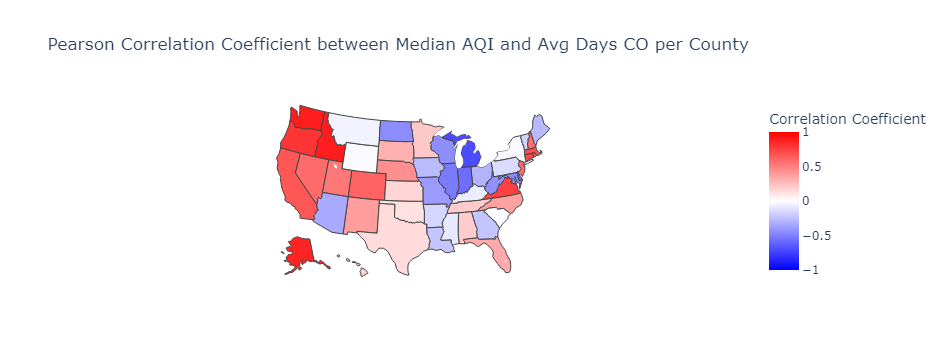

In [33]:
import plotly.express as px

# Assuming you have a dictionary called 'state_abbreviations' that maps state names to their abbreviations
# You can also find this dictionary in my previous responses or construct it based on your data
results_df['State_short'] = results_df['State'].map(state_abbreviations)

# Normalize the correlation coefficient to fit the color scale from -1 to 1
results_df['Normalized Correlation'] = results_df['Pearson Correlation Coefficient3']

# Creating the choropleth map
fig = px.choropleth(results_df,
                    locationmode='USA-states',    # Ensures that the map is USA states
                    locations='State_short',     # Column in your DataFrame with state abbreviations
                    color='Normalized Correlation',  # Column providing the values for coloring
                    color_continuous_scale=[(0, "blue"), (0.5, "white"), (1, "red")],  # Color scale
                    range_color=(-1, 1),  # Range of color scale
                    scope="usa",          # Scope to focus on the USA
                    labels={'Normalized Correlation': 'Correlation Coefficient'},
                    title='Pearson Correlation Coefficient between Median AQI and Avg Days CO per County')

# Show the figure
fig.show()

In [35]:
from scipy.stats import pearsonr
states=aqi_data['State'].unique()
corr=[]
p_value=[]
for state in states:
    filter_data = aqi_data[aqi_data['State'] == state]
    med_aqi_tmp=filter_data['Avg Median AQI per County']
    NO2_tmp=filter_data['Avg Days NO2 per County']
    # Filter out pairs where either element is NaN
    valid_mask = ~np.isnan(med_aqi_tmp) & ~np.isnan(NO2_tmp)
    med_aqi_tmp = med_aqi_tmp[valid_mask]
    NO2_tmp = NO2_tmp[valid_mask]

    # Calculate Pearson correlation coefficient
    corr_tmp, p_value_tmp = pearsonr(med_aqi_tmp, NO2_tmp)
    corr.append(corr_tmp)
    p_value.append(p_value_tmp)
# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'State': states,
    'Pearson Correlation Coefficient4': corr,
    'P-value': p_value
})

# Display the results
results_df = results_df.sort_values(by='Pearson Correlation Coefficient4', ascending=False)
results_df = results_df.reset_index(drop=True)
results_df

,State,Pearson Correlation Coefficient4,P-value
0,Nevada,0.839900,1.917921e-12
1,Virginia,0.717268,6.244513e-08
2,Washington,0.635890,4.601762e-06
3,California,0.469996,1.472591e-03
4,Rhode Island,0.429102,4.088650e-03
5,Kansas,0.416176,5.506801e-03
6,Tennessee,0.373947,1.350256e-02
7,Colorado,0.371970,1.404391e-02
8,Massachusetts,0.336838,2.719578e-02
9,Oregon,0.304888,4.681302e-02


In [36]:
# Filtering for states with high positive correlation (>= 0.7)
high_positive_corr_states = results_df[results_df['Pearson Correlation Coefficient4'] >= 0.7]

# Filtering for states with high negative correlation (<= -0.7)
high_negative_corr_states = results_df[results_df['Pearson Correlation Coefficient4'] <= -0.7]

# Combining the results
high_corr_states = pd.concat([high_positive_corr_states, high_negative_corr_states])

# Display the results
print(high_corr_states)

      State  Pearson Correlation Coefficient4       P-value
0    Nevada                          0.839900  1.917921e-12
1  Virginia                          0.717268  6.244513e-08


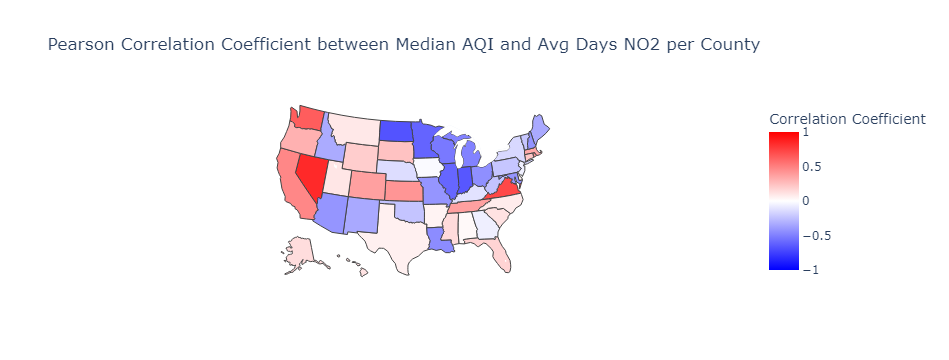

In [37]:
import plotly.express as px

# Assuming you have a dictionary called 'state_abbreviations' that maps state names to their abbreviations
# You can also find this dictionary in my previous responses or construct it based on your data
results_df['State_short'] = results_df['State'].map(state_abbreviations)

# Normalize the correlation coefficient to fit the color scale from -1 to 1
results_df['Normalized Correlation'] = results_df['Pearson Correlation Coefficient4']

# Creating the choropleth map
fig = px.choropleth(results_df,
                    locationmode='USA-states',    # Ensures that the map is USA states
                    locations='State_short',     # Column in your DataFrame with state abbreviations
                    color='Normalized Correlation',  # Column providing the values for coloring
                    color_continuous_scale=[(0, "blue"), (0.5, "white"), (1, "red")],  # Color scale
                    range_color=(-1, 1),  # Range of color scale
                    scope="usa",          # Scope to focus on the USA
                    labels={'Normalized Correlation': 'Correlation Coefficient'},
                    title='Pearson Correlation Coefficient between Median AQI and Avg Days NO2 per County')

# Show the figure
fig.show()

In [38]:
from scipy.stats import pearsonr
states=aqi_data['State'].unique()
corr=[]
p_value=[]
for state in states:
    filter_data = aqi_data[aqi_data['State'] == state]
    med_aqi_tmp=filter_data['Avg Median AQI per County']
    PM25_tmp=filter_data['Avg Days PM2.5 per County']
    # Filter out pairs where either element is NaN
    valid_mask = ~np.isnan(med_aqi_tmp) & ~np.isnan(PM25_tmp)
    med_aqi_tmp = med_aqi_tmp[valid_mask]
    PM25_tmp = PM25_tmp[valid_mask]

    # Calculate Pearson correlation coefficient
    corr_tmp, p_value_tmp = pearsonr(med_aqi_tmp, PM25_tmp)
    corr.append(corr_tmp)
    p_value.append(p_value_tmp)
# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'State': states,
    'Pearson Correlation Coefficient5': corr,
    'P-value': p_value
})

# Display the results
results_df = results_df.sort_values(by='Pearson Correlation Coefficient5', ascending=False)
results_df = results_df.reset_index(drop=True)
results_df

,State,Pearson Correlation Coefficient5,P-value
0,Illinois,0.789774,3.068446e-10
1,Iowa,0.756712,4.350513e-09
2,South Dakota,0.729162,2.080678e-07
3,Missouri,0.700334,1.716602e-07
4,North Dakota,0.683630,4.357952e-07
5,Michigan,0.681152,4.977984e-07
6,Arkansas,0.566012,7.626211e-05
7,Hawaii,0.530120,2.559860e-04
8,Indiana,0.529211,2.635010e-04
9,West Virginia,0.526323,2.887084e-04


In [39]:
# Filtering for states with high positive correlation (>= 0.7)
high_positive_corr_states = results_df[results_df['Pearson Correlation Coefficient5'] >= 0.7]

# Filtering for states with high negative correlation (<= -0.7)
high_negative_corr_states = results_df[results_df['Pearson Correlation Coefficient5'] <= -0.7]

# Combining the results
high_corr_states = pd.concat([high_positive_corr_states, high_negative_corr_states])

# Display the results
print(high_corr_states)

          State  Pearson Correlation Coefficient5       P-value
0      Illinois                          0.789774  3.068446e-10
1          Iowa                          0.756712  4.350513e-09
2  South Dakota                          0.729162  2.080678e-07
3      Missouri                          0.700334  1.716602e-07


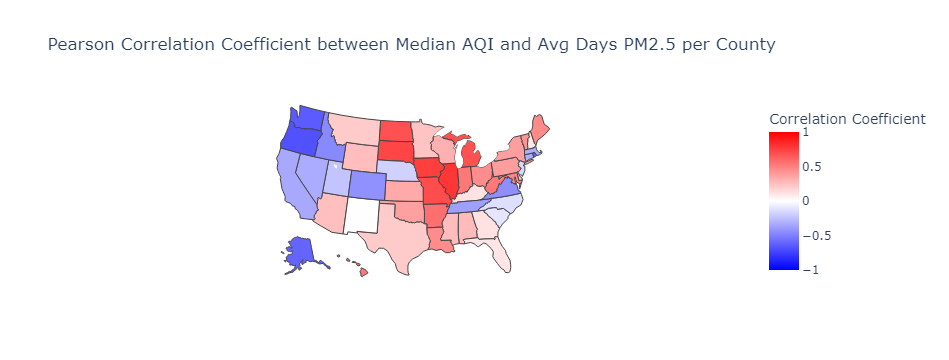

In [40]:
import plotly.express as px

# Assuming you have a dictionary called 'state_abbreviations' that maps state names to their abbreviations
# You can also find this dictionary in my previous responses or construct it based on your data
results_df['State_short'] = results_df['State'].map(state_abbreviations)

# Normalize the correlation coefficient to fit the color scale from -1 to 1
results_df['Normalized Correlation'] = results_df['Pearson Correlation Coefficient5']

# Creating the choropleth map
fig = px.choropleth(results_df,
                    locationmode='USA-states',    # Ensures that the map is USA states
                    locations='State_short',     # Column in your DataFrame with state abbreviations
                    color='Normalized Correlation',  # Column providing the values for coloring
                    color_continuous_scale=[(0, "blue"), (0.5, "white"), (1, "red")],  # Color scale
                    range_color=(-1, 1),  # Range of color scale
                    scope="usa",          # Scope to focus on the USA
                    labels={'Normalized Correlation': 'Correlation Coefficient'},
                    title='Pearson Correlation Coefficient between Median AQI and Avg Days PM2.5 per County')

# Show the figure
fig.show()

In [41]:
from scipy.stats import pearsonr
states=aqi_data['State'].unique()
corr=[]
p_value=[]
for state in states:
    filter_data = aqi_data[aqi_data['State'] == state]
    med_aqi_tmp=filter_data['Avg Median AQI per County']
    PM10_tmp=filter_data['Avg Days PM10 per County']
    # Filter out pairs where either element is NaN
    valid_mask = ~np.isnan(med_aqi_tmp) & ~np.isnan(PM10_tmp)
    med_aqi_tmp = med_aqi_tmp[valid_mask]
    PM10_tmp = PM10_tmp[valid_mask]

    # Calculate Pearson correlation coefficient
    corr_tmp, p_value_tmp = pearsonr(med_aqi_tmp, PM10_tmp)
    corr.append(corr_tmp)
    p_value.append(p_value_tmp)
# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'State': states,
    'Pearson Correlation Coefficient6': corr,
    'P-value': p_value
})

# Display the results
results_df = results_df.sort_values(by='Pearson Correlation Coefficient6', ascending=False)
results_df = results_df.reset_index(drop=True)
results_df

,State,Pearson Correlation Coefficient6,P-value
0,Arizona,0.494500,7.500360e-04
1,Oregon,0.280055,6.892354e-02
2,District Of Columbia,0.119856,4.439431e-01
3,Tennessee,0.111991,4.746155e-01
4,Alaska,0.078822,6.153683e-01
5,Wisconsin,0.051620,7.423502e-01
6,Georgia,0.026723,8.649322e-01
7,South Carolina,0.026179,8.676562e-01
8,Washington,0.022820,8.845137e-01
9,Rhode Island,-0.001406,9.928582e-01


In [42]:
# Filtering for states with high positive correlation (>= 0.7)
high_positive_corr_states = results_df[results_df['Pearson Correlation Coefficient6'] >= 0.7]

# Filtering for states with high negative correlation (<= -0.7)
high_negative_corr_states = results_df[results_df['Pearson Correlation Coefficient6'] <= -0.7]

# Combining the results
high_corr_states = pd.concat([high_positive_corr_states, high_negative_corr_states])

# Display the results
print(high_corr_states)

           State  Pearson Correlation Coefficient6       P-value
49  South Dakota                         -0.766212  2.061905e-08
50      Colorado                         -0.820709  1.609934e-11


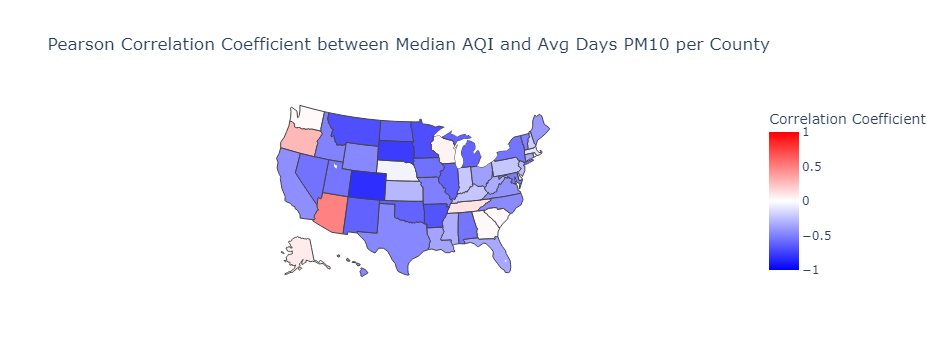

In [43]:
import plotly.express as px

# Assuming you have a dictionary called 'state_abbreviations' that maps state names to their abbreviations
# You can also find this dictionary in my previous responses or construct it based on your data
results_df['State_short'] = results_df['State'].map(state_abbreviations)

# Normalize the correlation coefficient to fit the color scale from -1 to 1
results_df['Normalized Correlation'] = results_df['Pearson Correlation Coefficient6']

# Creating the choropleth map
fig = px.choropleth(results_df,
                    locationmode='USA-states',    # Ensures that the map is USA states
                    locations='State_short',     # Column in your DataFrame with state abbreviations
                    color='Normalized Correlation',  # Column providing the values for coloring
                    color_continuous_scale=[(0, "blue"), (0.5, "white"), (1, "red")],  # Color scale
                    range_color=(-1, 1),  # Range of color scale
                    scope="usa",          # Scope to focus on the USA
                    labels={'Normalized Correlation': 'Correlation Coefficient'},
                    title='Pearson Correlation Coefficient between Median AQI and Avg Days PM10 per County')

# Show the figure
fig.show()

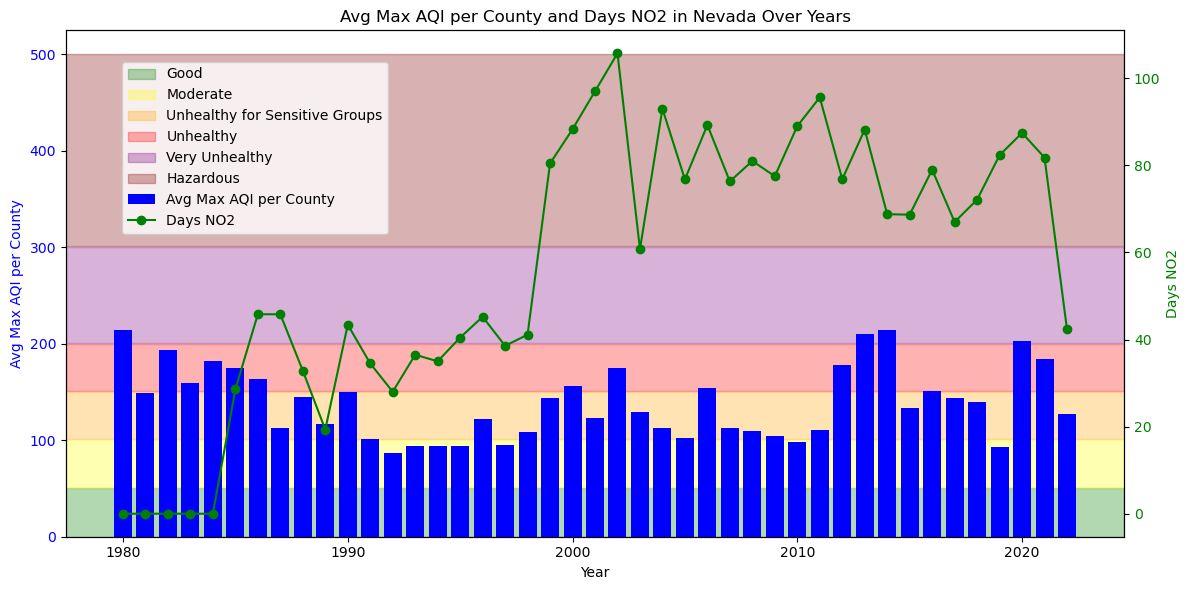

In [44]:
# Avg Days NO2 per County for Nevada
nevada_data = aqi_data[aqi_data['State'] == 'Nevada']
nevada_max_aqi = nevada_data[['Year', 'Avg Max AQI per County', 'Avg Days NO2 per County']]
nevada_max_aqi = nevada_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(nevada_max_aqi['Year'], nevada_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for the population data
ax2 = ax1.twinx()
ax2.plot(nevada_max_aqi['Year'], nevada_max_aqi['Avg Days PM10 per County'], color='green', marker='o', linestyle='-', label='Days NO2')
ax2.set_ylabel('Days NO2', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Chart title and legend
plt.title('Avg Max AQI per County and Days NO2 in Nevada Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

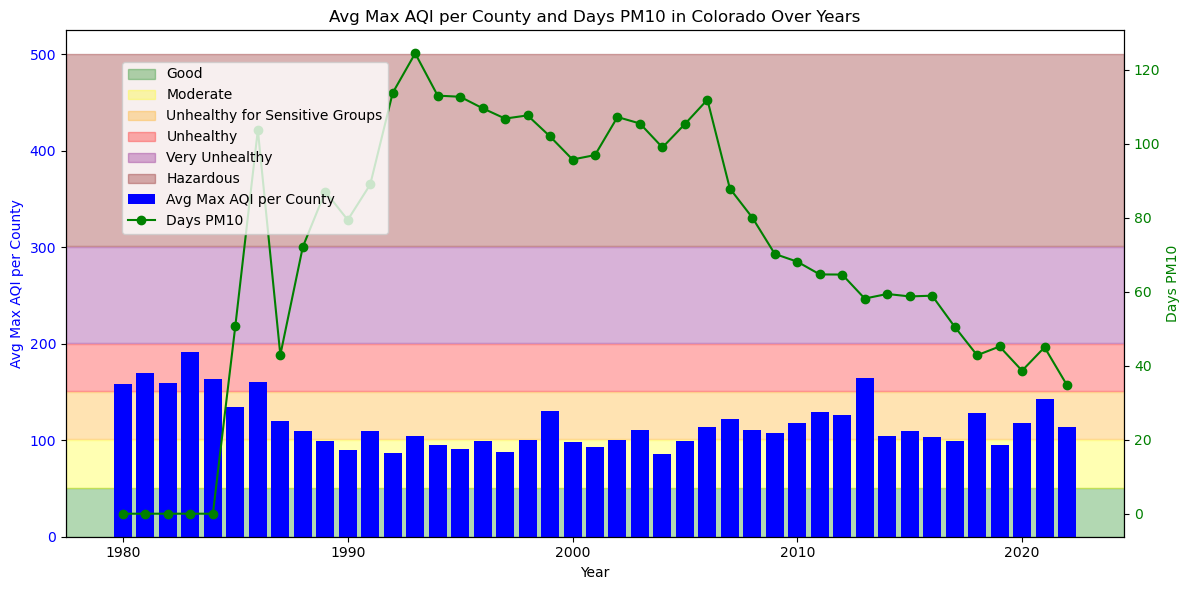

In [38]:
# Avg Days PM10 per County for Colorado
colorado_data = aqi_data[aqi_data['State'] == 'Colorado']
colorado_max_aqi = colorado_data[['Year', 'Avg Max AQI per County', 'Avg Days PM10 per County']]
colorado_max_aqi = colorado_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(colorado_max_aqi['Year'], colorado_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for the population data
ax2 = ax1.twinx()
ax2.plot(colorado_max_aqi['Year'], colorado_max_aqi['Avg Days PM10 per County'], color='green', marker='o', linestyle='-', label='Days PM10')
ax2.set_ylabel('Days PM10', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Chart title and legend
plt.title('Avg Max AQI per County and Days PM10 in Colorado Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

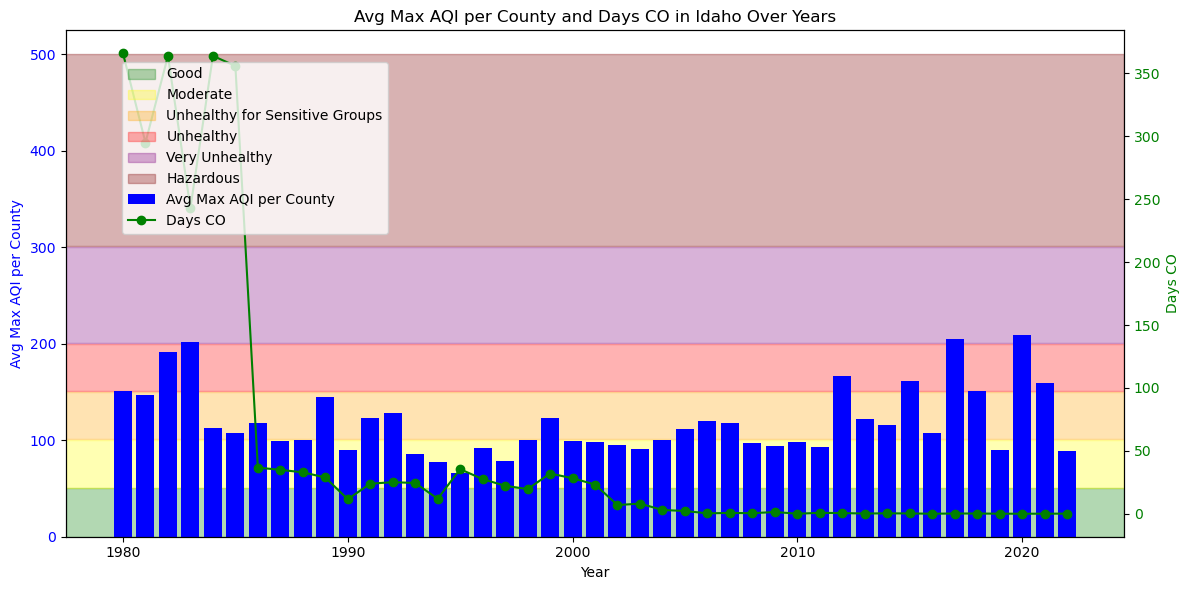

In [39]:
# Avg Days CO per County for Idaho
idaho_data = aqi_data[aqi_data['State'] == 'Idaho']
idaho_max_aqi = idaho_data[['Year', 'Avg Max AQI per County', 'Avg Days CO per County']]
idaho_max_aqi = idaho_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(idaho_max_aqi['Year'], idaho_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for the population data
ax2 = ax1.twinx()
ax2.plot(idaho_max_aqi['Year'], idaho_max_aqi['Avg Days CO per County'], color='green', marker='o', linestyle='-', label='Days CO')
ax2.set_ylabel('Days CO', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Chart title and legend
plt.title('Avg Max AQI per County and Days CO in Idaho Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()


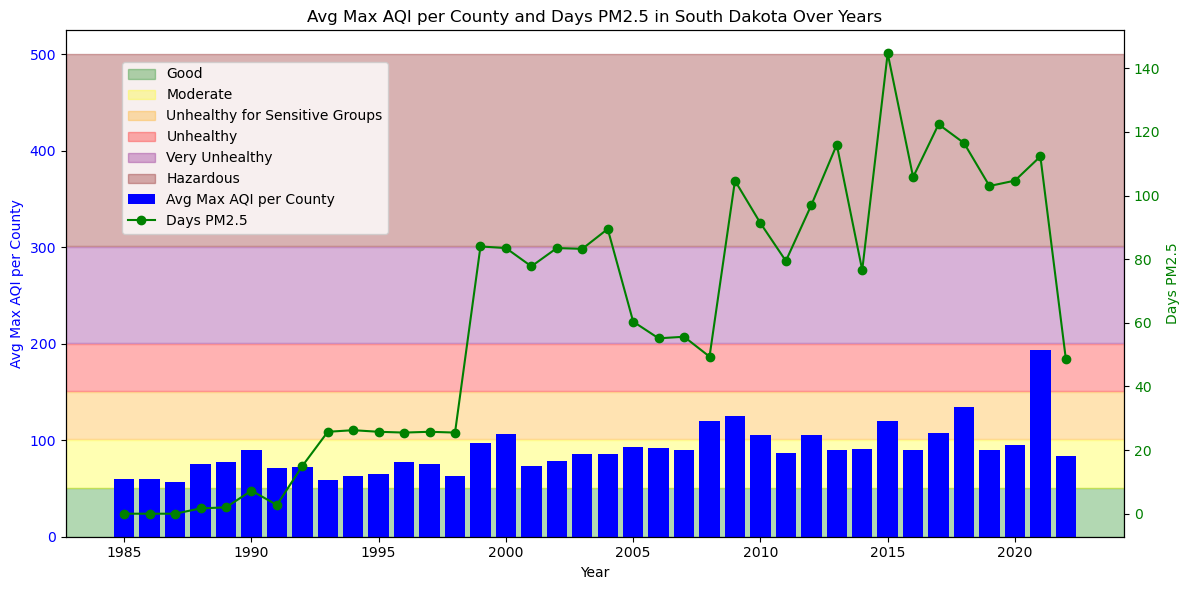

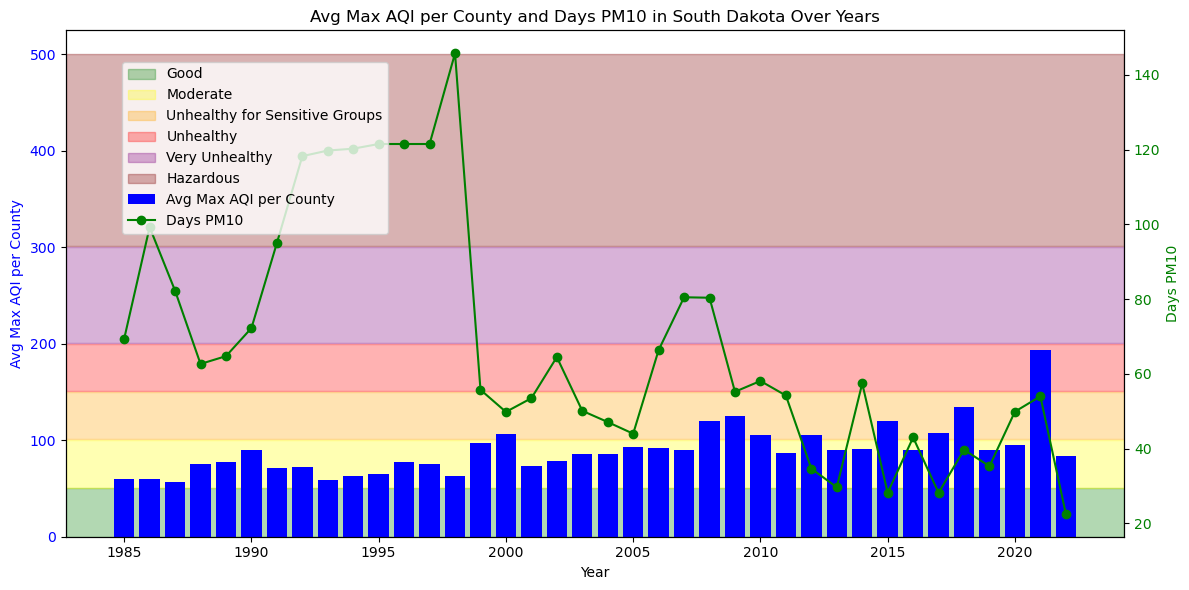

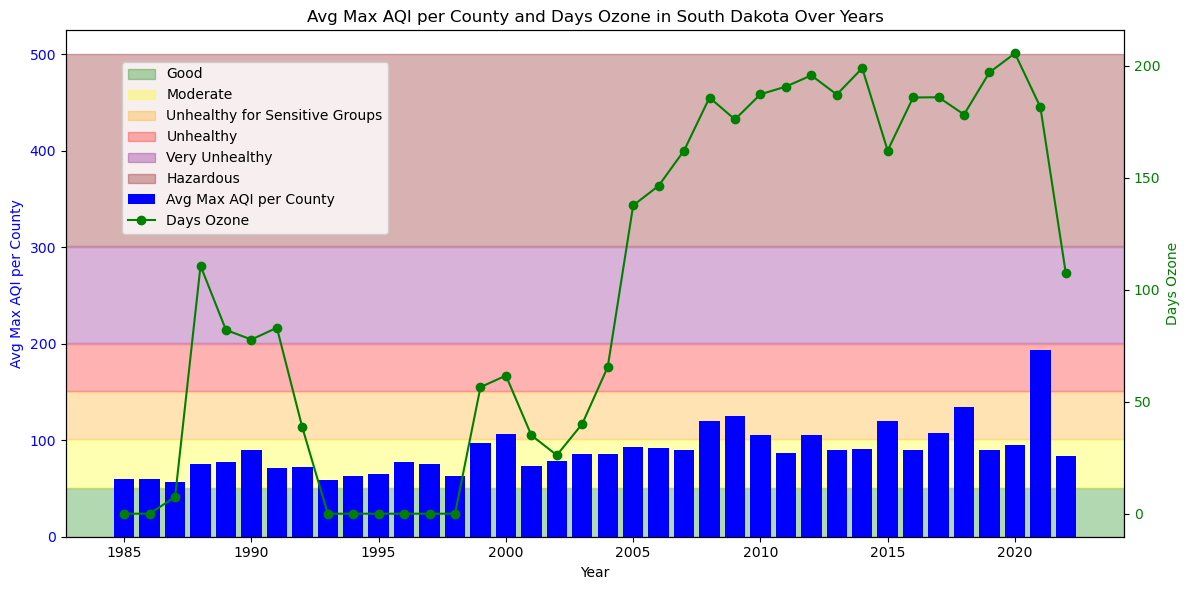

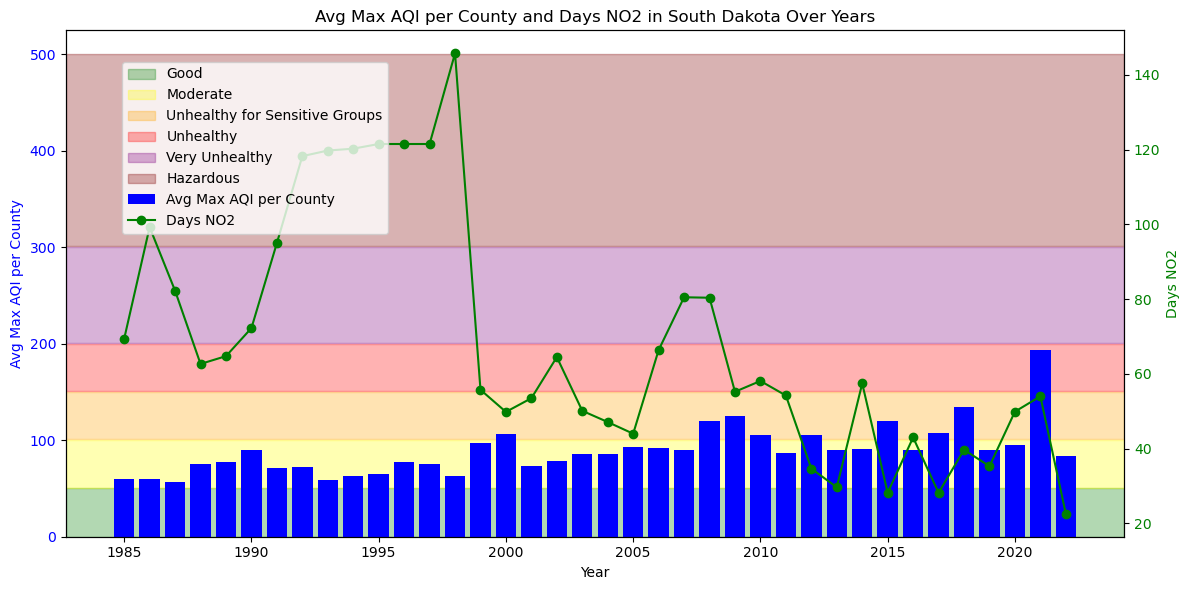

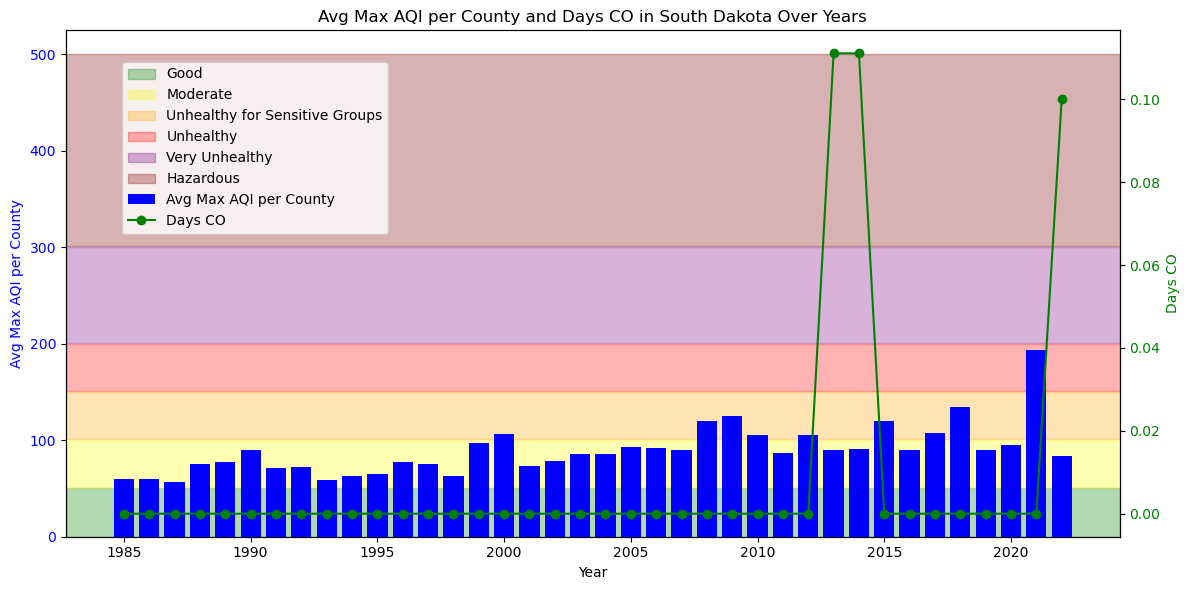

In [40]:
# Avg Days PM2.5 per County for South Dakota
south_dakota_data = aqi_data[aqi_data['State'] == 'South Dakota']
south_dakota_max_aqi = south_dakota_data[['Year', 'Avg Max AQI per County', 'Avg Days PM2.5 per County']]
south_dakota_max_aqi = south_dakota_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(south_dakota_max_aqi['Year'], south_dakota_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for the population data
ax2 = ax1.twinx()
ax2.plot(south_dakota_max_aqi['Year'], south_dakota_max_aqi['Avg Days PM2.5 per County'], color='green', marker='o', linestyle='-', label='Days PM2.5')
ax2.set_ylabel('Days PM2.5', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Chart title and legend
plt.title('Avg Max AQI per County and Days PM2.5 in South Dakota Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

# Avg Days PM10 per County for South Dakota
south_dakota_data = aqi_data[aqi_data['State'] == 'South Dakota']
south_dakota_max_aqi = south_dakota_data[['Year', 'Avg Max AQI per County', 'Avg Days PM10 per County']]
south_dakota_max_aqi = south_dakota_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(south_dakota_max_aqi['Year'], south_dakota_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for the population data
ax2 = ax1.twinx()
ax2.plot(south_dakota_max_aqi['Year'], south_dakota_max_aqi['Avg Days PM10 per County'], color='green', marker='o', linestyle='-', label='Days PM10')
ax2.set_ylabel('Days PM10', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Chart title and legend
plt.title('Avg Max AQI per County and Days PM10 in South Dakota Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

# Avg Days Ozone per County for South Dakota
south_dakota_data = aqi_data[aqi_data['State'] == 'South Dakota']
south_dakota_max_aqi = south_dakota_data[['Year', 'Avg Max AQI per County', 'Avg Days Ozone per County']]
south_dakota_max_aqi = south_dakota_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(south_dakota_max_aqi['Year'], south_dakota_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for the population data
ax2 = ax1.twinx()
ax2.plot(south_dakota_max_aqi['Year'], south_dakota_max_aqi['Avg Days Ozone per County'], color='green', marker='o', linestyle='-', label='Days Ozone')
ax2.set_ylabel('Days Ozone', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Chart title and legend
plt.title('Avg Max AQI per County and Days Ozone in South Dakota Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

# Avg Days NO2 per County for South Dakota
south_dakota_data = aqi_data[aqi_data['State'] == 'South Dakota']
south_dakota_max_aqi = south_dakota_data[['Year', 'Avg Max AQI per County', 'Avg Days NO2 per County']]
south_dakota_max_aqi = south_dakota_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(south_dakota_max_aqi['Year'], south_dakota_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for the population data
ax2 = ax1.twinx()
ax2.plot(south_dakota_max_aqi['Year'], south_dakota_max_aqi['Avg Days PM10 per County'], color='green', marker='o', linestyle='-', label='Days NO2')
ax2.set_ylabel('Days NO2', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Chart title and legend
plt.title('Avg Max AQI per County and Days NO2 in South Dakota Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

# Avg Days CO per County for South Dakota
south_dakota_data = aqi_data[aqi_data['State'] == 'South Dakota']
south_dakota_max_aqi = south_dakota_data[['Year', 'Avg Max AQI per County', 'Avg Days CO per County']]
south_dakota_max_aqi = south_dakota_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(south_dakota_max_aqi['Year'], south_dakota_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for the population data
ax2 = ax1.twinx()
ax2.plot(south_dakota_max_aqi['Year'], south_dakota_max_aqi['Avg Days CO per County'], color='green', marker='o', linestyle='-', label='Days CO')
ax2.set_ylabel('Days CO', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Chart title and legend
plt.title('Avg Max AQI per County and Days CO in South Dakota Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()


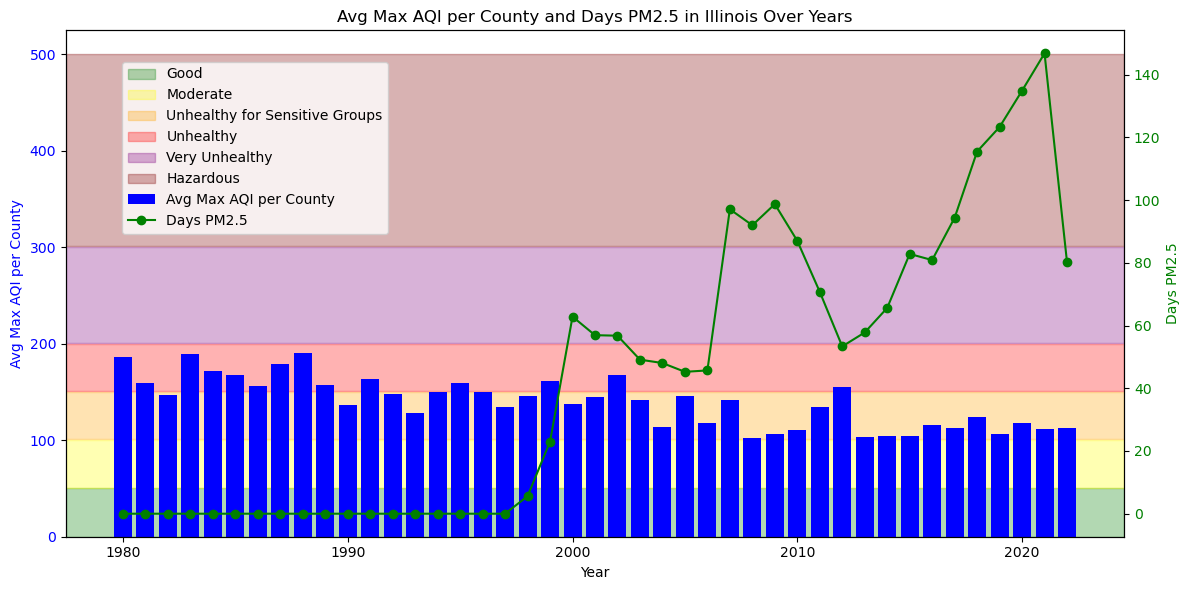

NameError: name 'michigan_max_aqi' is not defined

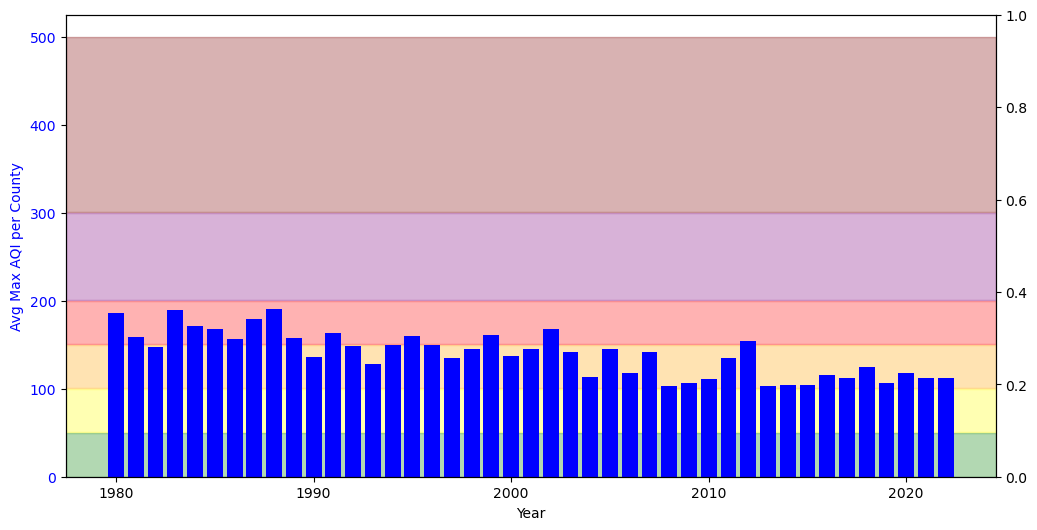

In [41]:
# Filter data for Illinois
illinois_data = aqi_data[aqi_data['State'] == 'Illinois']
illinois_max_aqi = illinois_data[['Year', 'Avg Max AQI per County', 'Avg Days PM2.5 per County']]
illinois_max_aqi = illinois_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(illinois_max_aqi['Year'], illinois_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for the population data
ax2 = ax1.twinx()
ax2.plot(illinois_max_aqi['Year'], illinois_max_aqi['Avg Days PM2.5 per County'], color='green', marker='o', linestyle='-', label='Days PM2.5')
ax2.set_ylabel('Days PM2.5', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Chart title and legend
plt.title('Avg Max AQI per County and Days PM2.5 in Illinois Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()



# Avg Days PM10 per County for Illinois
illinois_data = aqi_data[aqi_data['State'] == 'Illinois']
illinois_max_aqi = illinois_data[['Year', 'Avg Max AQI per County', 'Avg Days PM10 per County']]
illinois_max_aqi = illinois_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(illinois_max_aqi['Year'], illinois_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis 
ax2 = ax1.twinx()
ax2.plot(michigan_max_aqi['Year'], michigan_max_aqi['Avg Days PM2.5 per County'], color='green', marker='o', linestyle='-', label='Days PM10')
ax2.set_ylabel('Days PM10', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Chart title and legend
plt.title('Avg Max AQI per County and Days PM10 in Illinois Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

# Avg Days Ozone per County for Illinois
illinois_data = aqi_data[aqi_data['State'] == 'Illinois']
illinois_max_aqi = illinois_data[['Year', 'Avg Max AQI per County', 'Avg Days Ozone per County']]
illinois_max_aqi = illinois_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(illinois_max_aqi['Year'], illinois_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for the population data
ax2 = ax1.twinx()
ax2.plot(illinois_max_aqi['Year'], illinois_max_aqi['Avg Days Ozone per County'], color='green', marker='o', linestyle='-', label='Days Ozone')
ax2.set_ylabel('Days Ozone', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Chart title and legend
plt.title('Avg Max AQI per County and Days Ozone in Illinois Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

# Avg Days NO2 per County for Illinois
illinois_data = aqi_data[aqi_data['State'] == 'Illinois']
illinois_max_aqi = illinois_data[['Year', 'Avg Max AQI per County', 'Avg Days NO2 per County']]
illinois_max_aqi = illinois_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(illinois_max_aqi['Year'], illinois_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for the population data
ax2 = ax1.twinx()
ax2.plot(illinois_max_aqi['Year'], illinois_max_aqi['Avg Days NO2 per County'], color='green', marker='o', linestyle='-', label='Days NO2')
ax2.set_ylabel('Days NO2', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Chart title and legend
plt.title('Avg Max AQI per County and Days NO2 in Illinois Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

# Avg Days CO per County for Illinois
illinois_data = aqi_data[aqi_data['State'] == 'Illinois']
illinois_max_aqi = illinois_data[['Year', 'Avg Max AQI per County', 'Avg Days CO per County']]
illinois_max_aqi = illinois_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(illinois_max_aqi['Year'], illinois_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for the population data
ax2 = ax1.twinx()
ax2.plot(illinois_max_aqi['Year'], illinois_max_aqi['Avg Days CO per County'], color='green', marker='o', linestyle='-', label='Days CO')
ax2.set_ylabel('DaysCO', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Chart title and legend
plt.title('Avg Max AQI per County and Days CO in Illinois Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

In [ ]:
# Filter data for Michigan
michigan_data = aqi_data[aqi_data['State'] == 'Michigan']
michigan_max_aqi = michigan_data[['Year', 'Avg Max AQI per County', 'Avg Days PM2.5 per County']]
michigan_max_aqi = michigan_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(michigan_max_aqi['Year'], michigan_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for the population data
ax2 = ax1.twinx()
ax2.plot(michigan_max_aqi['Year'], michigan_max_aqi['Avg Days PM2.5 per County'], color='green', marker='o', linestyle='-', label='Days PM2.5')
ax2.set_ylabel('Days PM2.5', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Chart title and legend
plt.title('Avg Max AQI per County and Days PM2.5 in Michigan Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

# Avg Days PM10 per County for Michigan
michigan_data = aqi_data[aqi_data['State'] == 'Michigan']
michigan_max_aqi = michigan_data[['Year', 'Avg Max AQI per County', 'Avg Days PM10 per County']]
michigan_max_aqi = michigan_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(michigan_max_aqi['Year'], michigan_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for the population data
ax2 = ax1.twinx()
ax2.plot(michigan_max_aqi['Year'], michigan_max_aqi['Avg Days PM2.5 per County'], color='green', marker='o', linestyle='-', label='Days PM10')
ax2.set_ylabel('Days PM10', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Chart title and legend
plt.title('Avg Max AQI per County and Days PM10 in Michigan Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

# Avg Days Ozone per County for Michigan
michigan_data = aqi_data[aqi_data['State'] == 'Michigan']
michigan_max_aqi = michigan_data[['Year', 'Avg Max AQI per County', 'Avg Days Ozone per County']]
michigan_max_aqi = michigan_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(michigan_max_aqi['Year'], michigan_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for the population data
ax2 = ax1.twinx()
ax2.plot(michigan_max_aqi['Year'], michigan_max_aqi['Avg Days Ozone per County'], color='green', marker='o', linestyle='-', label='Days Ozone')
ax2.set_ylabel('Days Ozone', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Chart title and legend
plt.title('Avg Max AQI per County and Days Ozone in Michigan Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

# Avg Days NO2 per County for Michigan
michigan_data = aqi_data[aqi_data['State'] == 'Michigan']
michigan_max_aqi = michigan_data[['Year', 'Avg Max AQI per County', 'Avg Days NO2 per County']]
michigan_max_aqi = michigan_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(michigan_max_aqi['Year'], michigan_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for the population data
ax2 = ax1.twinx()
ax2.plot(michigan_max_aqi['Year'], michigan_max_aqi['Avg Days NO2 per County'], color='green', marker='o', linestyle='-', label='Days NO2')
ax2.set_ylabel('Days NO2', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Chart title and legend
plt.title('Avg Max AQI per County and Days NO2 in Michigan Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

# Avg Days CO per County for Michigan
michigan_data = aqi_data[aqi_data['State'] == 'Michigan']
michigan_max_aqi = michigan_data[['Year', 'Avg Max AQI per County', 'Avg Days CO per County']]
michigan_max_aqi = michigan_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(michigan_max_aqi['Year'], michigan_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for the population data
ax2 = ax1.twinx()
ax2.plot(michigan_max_aqi['Year'], michigan_max_aqi['Avg Days CO per County'], color='green', marker='o', linestyle='-', label='Days CO')
ax2.set_ylabel('DaysCO', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Chart title and legend
plt.title('Avg Max AQI per County and Days CO in Michigan Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

In [ ]:
# Avg Days PM2.5 per County for New York
newyork_data = aqi_data[aqi_data['State'] == 'New York']
newyork_max_aqi = newyork_data[['Year', 'Avg Max AQI per County', 'Avg Days PM2.5 per County']]
newyork_max_aqi = newyork_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(newyork_max_aqi['Year'], newyork_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for the population data
ax2 = ax1.twinx()
ax2.plot(newyork_max_aqi['Year'], newyork_max_aqi['Avg Days PM2.5 per County'], color='green', marker='o', linestyle='-', label='Days PM2.5')
ax2.set_ylabel('Days PM2.5', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Chart title and legend
plt.title('Avg Max AQI per County and Days PM2.5 in New York Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

# Avg Days NO2 per County for New York
newyork_data = aqi_data[aqi_data['State'] == 'New York']
newyork_max_aqi = newyork_data[['Year', 'Avg Max AQI per County', 'Avg Days NO2 per County']]
newyork_max_aqi = newyork_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(newyork_max_aqi['Year'], newyork_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for the population data
ax2 = ax1.twinx()
ax2.plot(newyork_max_aqi['Year'], newyork_max_aqi['Avg Days NO2 per County'], color='green', marker='o', linestyle='-', label='Days NO2')
ax2.set_ylabel('Days NO2', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Chart title and legend
plt.title('Avg Max AQI per County and Days NO2 in New York Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()


In [ ]:
# Avg Days PM2.5 per County for Washington
washington_data = aqi_data[aqi_data['State'] == 'Washington']
washington_max_aqi = washington_data[['Year', 'Avg Max AQI per County', 'Avg Days PM2.5 per County']]
washington_max_aqi = washington_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(washington_max_aqi['Year'], washington_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for the population data
ax2 = ax1.twinx()
ax2.plot(washington_max_aqi['Year'], washington_max_aqi['Avg Days PM2.5 per County'], color='green', marker='o', linestyle='-', label='Days PM2.5')
ax2.set_ylabel('Days PM2.5', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Chart title and legend
plt.title('Avg Max AQI per County and Days PM2.5 in Washington Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

# Avg Days CO per County for Washington
washington_data = aqi_data[aqi_data['State'] == 'Washington']
washington_max_aqi = washington_data[['Year', 'Avg Max AQI per County', 'Avg Days CO per County']]
washington_max_aqi = washington_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(washington_max_aqi['Year'], washington_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for the population data
ax2 = ax1.twinx()
ax2.plot(washington_max_aqi['Year'], washington_max_aqi['Avg Days CO per County'], color='green', marker='o', linestyle='-', label='Days CO')
ax2.set_ylabel('Days CO', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Chart title and legend
plt.title('Avg Max AQI per County and Days NO2 in Washington Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()


# Avg Days NO2 per County for Washington
washington_data = aqi_data[aqi_data['State'] == 'Washington']
washington_max_aqi = washington_data[['Year', 'Avg Max AQI per County', 'Avg Days NO2 per County']]
washington_max_aqi = washington_data.sort_values(by = 'Year')
# Define AQI categories and their corresponding color
aqi_categories = {
    'Good': {'range': (0, 50), 'color': 'green'},
    'Moderate': {'range': (51, 100), 'color': 'yellow'},
    'Unhealthy for Sensitive Groups': {'range': (101, 150), 'color': 'orange'},
    'Unhealthy': {'range': (151, 200), 'color': 'red'},
    'Very Unhealthy': {'range': (201, 300), 'color': 'purple'},
    'Hazardous': {'range': (301, 500), 'color': 'maroon'}
}

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))
# Add colored patches for AQI categories
for category, info in aqi_categories.items():
    plt.axhspan(info['range'][0], info['range'][1], color=info['color'], alpha=0.3, label=category)
# Plot the Avg Max AQI values
ax1.bar(washington_max_aqi['Year'], washington_max_aqi['Avg Max AQI per County'], color='blue', label='Avg Max AQI per County')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg Max AQI per County', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for the population data
ax2 = ax1.twinx()
ax2.plot(washington_max_aqi['Year'], washington_max_aqi['Avg Days NO2 per County'], color='green', marker='o', linestyle='-', label='Days NO2')
ax2.set_ylabel('Days NO2', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Chart title and legend
plt.title('Avg Max AQI per County and Days NO2 in Washington Over Years')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()
